# About

I use logistic regression to try and predict if a hotel booking will be cancelled. I start off by detailing the libraries that i will use. I move on to the data investigation/prep stage, this is fairly self explanatory but is where we further understand the data to ensure that we have good quality data going into the model. I then move onto the prediction stage, where we build our model and finish off with the conclusion.

# Import libraries

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt



ImportError: cannot import name 'log_reg' from 'sklearn.metrics' (C:\Users\Chris\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

# Data investigation/prep

In [2]:
df=pd.read_csv('Hotel Reservations.csv')
print(df.head())

  Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_

In [3]:
print(df.dtypes)

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object


In [4]:
print(pd.isnull(df).sum())

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


In [5]:
print('The total number of records is', len(df))

for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The total number of records is 36275
The number of values for feature Booking_ID :36275
The number of values for feature no_of_adults :5 -- [0 1 2 3 4]
The number of values for feature no_of_children :6 -- [ 0  1  2  3  9 10]
The number of values for feature no_of_weekend_nights :8 -- [0 1 2 3 4 5 6 7]
The number of values for feature no_of_week_nights :18
The number of values for feature type_of_meal_plan :4 -- ['Meal Plan 1' 'Meal Plan 2' 'Meal Plan 3' 'Not Selected']
The number of values for feature required_car_parking_space :2 -- [0 1]
The number of values for feature room_type_reserved :7 -- ['Room_Type 1' 'Room_Type 2' 'Room_Type 3' 'Room_Type 4' 'Room_Type 5'
 'Room_Type 6' 'Room_Type 7']
The number of values for feature lead_time :352
The number of values for feature arrival_year :2 -- [2017 2018]
The number of values for feature arrival_month :12
The number of values for feature arrival_date :31
The number of values for feature market_segment_type :5 -- ['Aviation' 'Complemen

In [6]:
variable_list = []
for c in df.columns:
    variable_list.append(c)
    
print(variable_list)

['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_status']


Initial thoughts on data:
    -No missing values that need to be managed
    -Everything else seems fine

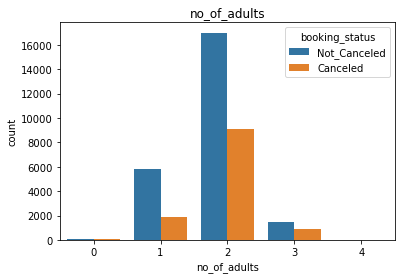

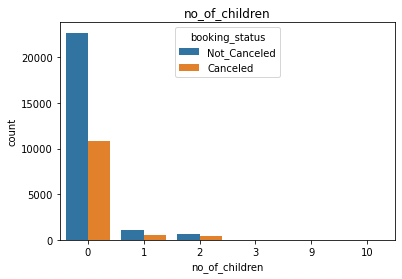

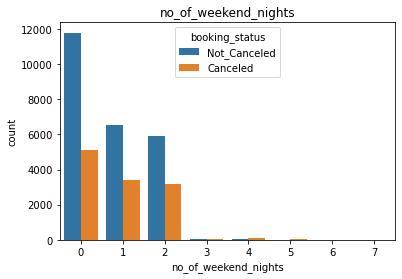

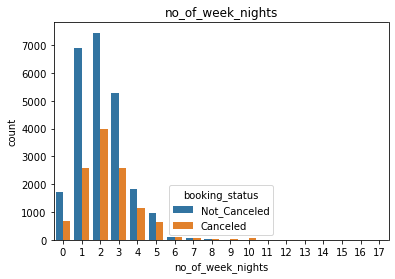

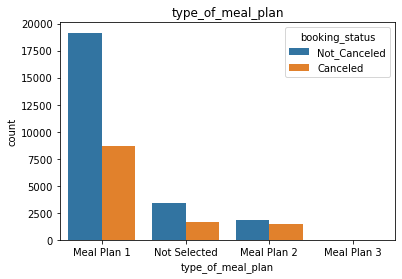

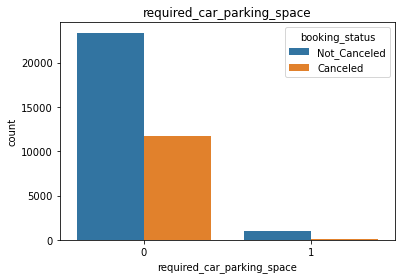

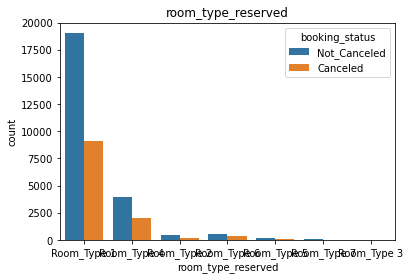

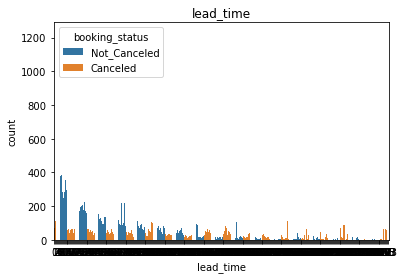

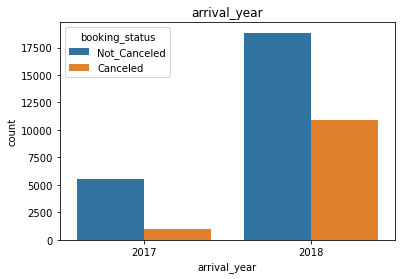

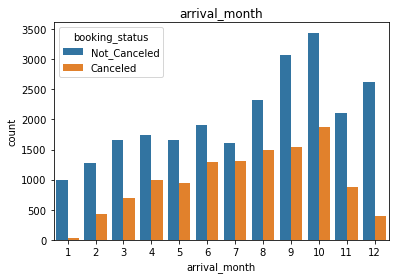

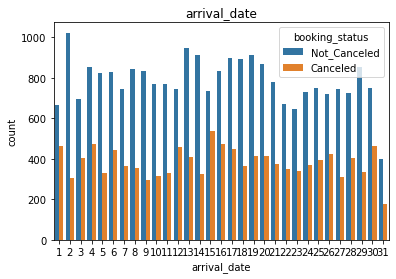

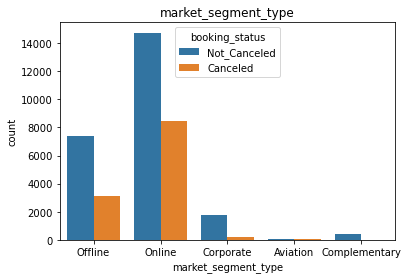

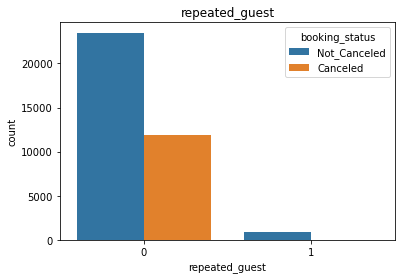

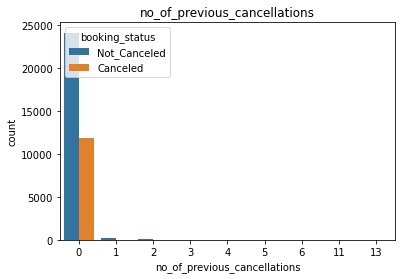

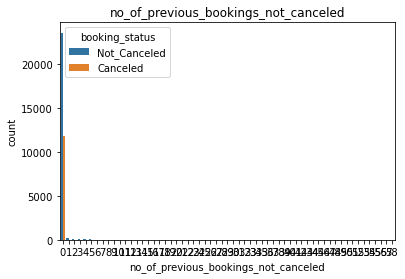

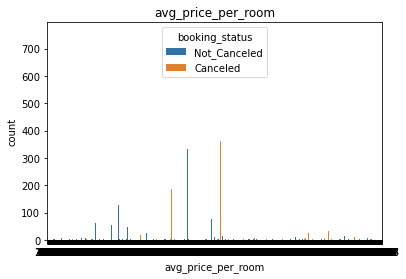

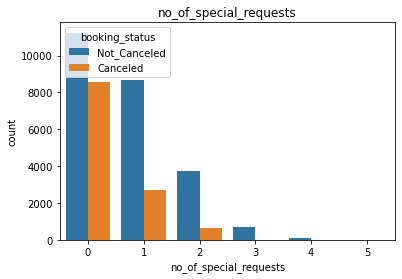

In [7]:
catergorical_columns = 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests'

for n in catergorical_columns:
    sns.countplot(x = n , data = df, hue = 'booking_status')
    plt.title(n)
    plt.show()
    

AxesSubplot(0.125,0.125;0.62x0.755)


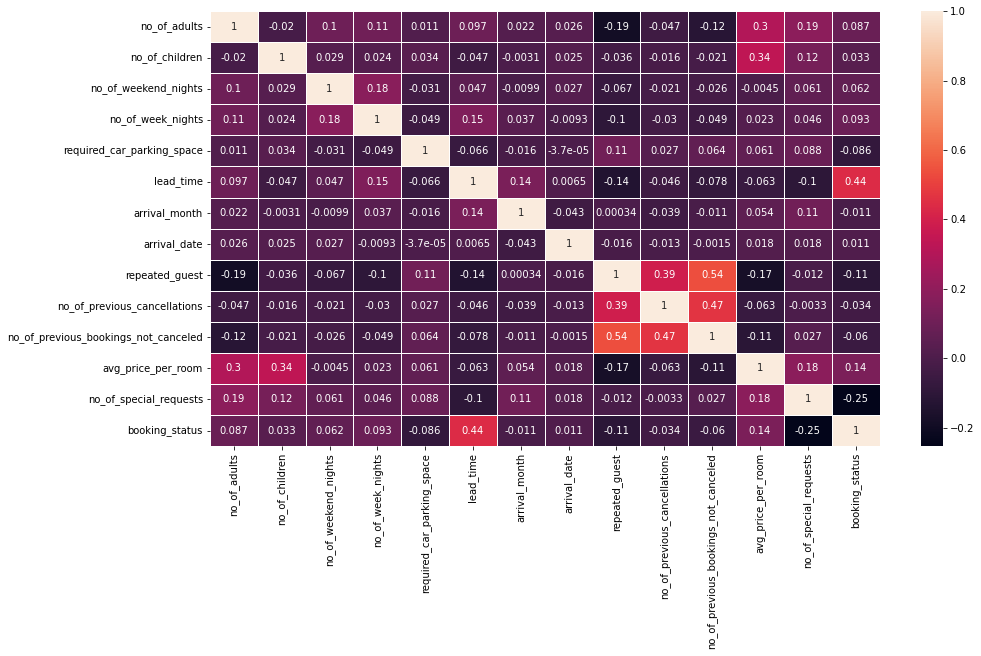

In [24]:
df1 = df.drop(columns = ['Booking_ID', 'arrival_year'])
df1["booking_status"] = df1["booking_status"].replace(['Canceled'],1)
df1["booking_status"] = df1["booking_status"].replace(['Not_Canceled'],0)

corr=df1.corr()

plt.figure(figsize=(15,8))
g = sns.heatmap(corr, annot = True, linewidths=.5)
print(g)

In [20]:
df2 = pd.get_dummies(df1)
X = df2.drop('booking_status', axis = 1).values
y = df2['booking_status']

y = y.astype(int)

In [21]:
dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [23]:
fi_col = []
fi = []

for i,column in enumerate(df2.drop('booking_status', axis = 1)):
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])



fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df


# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

print(fi_df)

    index                               Feature  Feature Importance
0       5                             lead_time            0.369347
1      28            market_segment_type_Online            0.147615
2      11                    avg_price_per_room            0.143334
3      12                no_of_special_requests            0.131236
4       6                         arrival_month            0.082493
5       3                     no_of_week_nights            0.027021
6       2                  no_of_weekend_nights            0.024975
7       7                          arrival_date            0.020943
8       0                          no_of_adults            0.020614
9       4            required_car_parking_space            0.011596
10     27           market_segment_type_Offline            0.006467
11     13         type_of_meal_plan_Meal Plan 1            0.003136
12     16        type_of_meal_plan_Not Selected            0.002417
13     17        room_type_reserved_Room_Type 1 

# Prediction phase -bookmark

In [42]:


x= df2[['lead_time','no_of_special_requests','avg_price_per_room','market_segment_type_Online']]
y= df2['booking_status']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y)
                                       


In [44]:
lr = LogisticRegression(solver = 'lbfgs')
lr.fit(x_train, y_train)
prediction =lr.predict(x_train.values)

In [56]:
# Accuracy on Train
print("The Training Accuracy is: ", lr.score(x_train, y_train))
print("The Training log loss (cross entropy) is: ",log_loss(y_train, lr.predict_proba(x_train)))

# Classification Report
print(classification_report(y_train, lr.predict(x_train)))

The Training Accuracy is:  0.8003014041020363
The Training log loss (cross entropy) is:  0.4369334029085521
              precision    recall  f1-score   support

           0       0.82      0.89      0.86     18308
           1       0.74      0.61      0.66      8898

    accuracy                           0.80     27206
   macro avg       0.78      0.75      0.76     27206
weighted avg       0.80      0.80      0.79     27206



# resources
- data is taken from: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset